In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wandb
import scipy.interpolate


entity = 'andyliu'
projects = ['GridNav_Reward_Shaping', 'GridNav_Visible_Platform_Colored_Walls']

api = wandb.Api()

def get_runs(project_idx=0):
    return api.runs(path=entity +'/' + projects[project_idx])


In [8]:
runs = api.runs(path=entity+'/' + project)

# Checking episodic returns for different reward shaping params

In [149]:
#collect data from wandb

shapes = [[] for i in range(4)]

for i, run in enumerate(runs):
    if run.state == 'finished':
        shape = run.config['env_kwargs']['reward_shaping']
        metrics = run.history()
        df = metrics[['_step', 'global_step', 'charts/episodic_length']]
        df = df.dropna()
        df.loc[:, 'ewm'] = df['charts/episodic_length'].ewm(alpha=0.01).mean()
        shapes[shape].append(df)


Text(0.5, 0, 'timesteps trained')

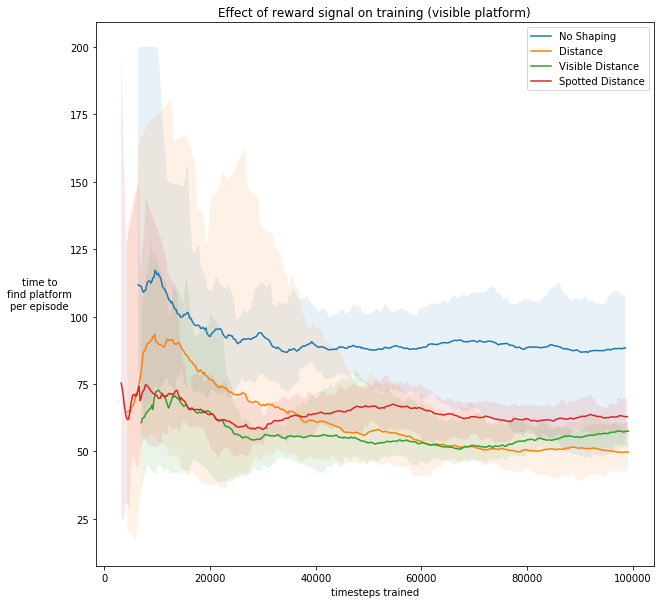

In [197]:
# fig, ax = plt.subplots(2, 2, figsize=(12, 12))
plt.figure(figsize=(10, 10))

labels = ['No Shaping', 'Distance', 'Visible Distance', 'Spotted Distance']
for i in range(4):
    # plot_x, plot_y = 
    first_xs = []
    last_xs = []
    inters = []
    for j in range(len(shapes[i])):
        df = shapes[i][j]

        first_xs.append(df.iloc[0]['global_step'])
        last_xs.append(df.iloc[-1]['global_step'])

        inter = scipy.interpolate.interp1d(df['global_step'], df['ewm'])
        inters.append(inter)

        # plt.plot(df['global_step'], df['ewm'])

    min_x = np.max(first_xs)
    max_x = np.min(last_xs)
    xs = np.arange(min_x, max_x, 200)
    ys = np.zeros((len(shapes[i]), len(xs)))

    for j in range(len(shapes[i])):
        ys[j] = inters[j](xs)

    plt.fill_between(xs, ys.min(axis=0), ys.max(axis=0), alpha=0.1)
    plt.plot(xs, ys.mean(axis=0), label=labels[i])
    
plt.legend()
plt.title('Effect of reward signal on training (visible platform)')
plt.ylabel('time to\nfind platform\nper episode', rotation=0, va='center', labelpad=30)
plt.xlabel('timesteps trained')

In [31]:
import wandb
api = wandb.Api()

# run is specified by <entity>/<project>/<run id>
run = api.run("andyliu/GridNav_Reward_Shaping/1eb8xzj6")

# save the metrics for the run to a csv file
metrics_dataframe = run.history()
metrics_dataframe.to_csv("metrics.csv")

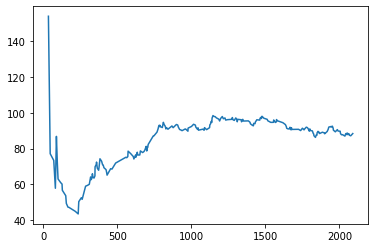

In [62]:
plt.plot(df2['_step'], df2['charts/episodic_length'].ewm(alpha=0.01).mean())

# Wall colors with visible platform

In [213]:
#collect data from wandb
# runs = get_runs(1)

colors = [2, 2.5, 4]
datas = [[] for i in range(len(colors) + 1)]

runs = get_runs(0)
for i, run in enumerate(runs):
    if run.state == 'finished':
        shape = run.config['env_kwargs']['reward_shaping']
        if shape == 1:
            metrics = run.history()
            df = metrics[['_step', 'global_step', 'charts/episodic_length']]
            df = df.dropna()
            df.loc[:, 'ewm'] = df['charts/episodic_length'].ewm(alpha=0.01).mean()
            datas[0].append(df)

runs = get_runs(1)
for i, run in enumerate(runs):
    if run.state == 'finished':
        color = run.config['env_kwargs']['wall_colors']
        metrics = run.history()
        df = metrics[['_step', 'global_step', 'charts/episodic_length']]
        df = df.dropna()
        df.loc[:, 'ewm'] = df['charts/episodic_length'].ewm(alpha=0.01).mean()
        datas[colors.index(color) + 1].append(df)
        



In [227]:
colors = [1, 2, 2.5, 4]
datas = [[] for i in range(len(colors))]

runs = get_runs(1)
for i, run in enumerate(runs):
    print(run.summary['global_step'])
    if run.state == 'finished' and run.summary['global_step'] > 200000:
        color = run.config['env_kwargs']['wall_colors']
        metrics = run.history()
        df = metrics[['_step', 'global_step', 'charts/episodic_length']]
        df = df.dropna()
        df.loc[:, 'ewm'] = df['charts/episodic_length'].ewm(alpha=0.01).mean()
        datas[colors.index(color)].append(df)
        



219744
399840
399840
399840
399840
399840
399840
399840
399840
399840
399840
399840
399840
399840
399840
399840
399840
399840
399840
399840
399840
399840
399840
399840
399840
399840
399840
399840
399840
399840
399840
399840
399840
399840
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000


Text(0.5, 0, 'timesteps trained')

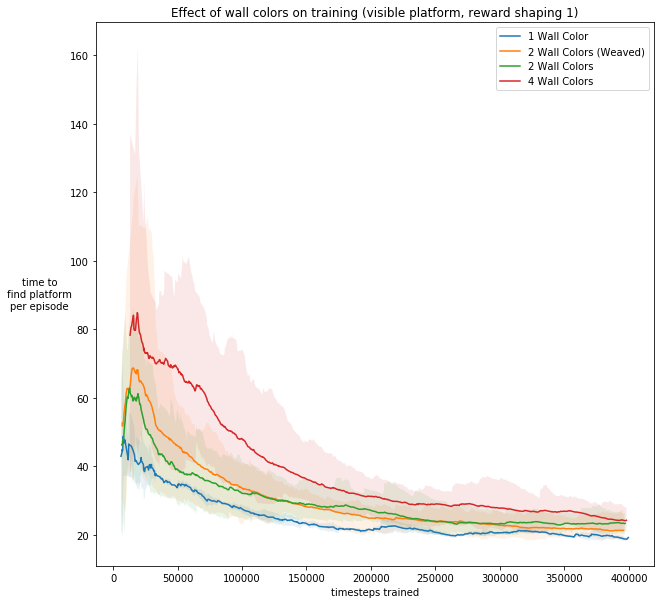

In [228]:
# fig, ax = plt.subplots(2, 2, figsize=(12, 12))
plt.figure(figsize=(10, 10))

labels = ['1 Wall Color', '2 Wall Colors (Weaved)', '2 Wall Colors', '4 Wall Colors']
for i in range(4):
    # plot_x, plot_y = 
    first_xs = []
    last_xs = []
    inters = []
    for j in range(len(datas[i])):
        df = datas[i][j]

        first_xs.append(df.iloc[0]['global_step'])
        last_xs.append(df.iloc[-1]['global_step'])

        inter = scipy.interpolate.interp1d(df['global_step'], df['ewm'])
        inters.append(inter)

        # plt.plot(df['global_step'], df['ewm'])

    min_x = np.max(first_xs)
    max_x = np.min(last_xs)
    xs = np.arange(min_x, max_x, 200)
    ys = np.zeros((len(datas[i]), len(xs)))

    for j in range(len(datas[i])):
        ys[j] = inters[j](xs)

    plt.fill_between(xs, ys.min(axis=0), ys.max(axis=0), alpha=0.1)
    plt.plot(xs, ys.mean(axis=0), label=labels[i])
    

    
plt.legend()
plt.title('Effect of wall colors on training (visible platform, reward shaping 1)')
plt.ylabel('time to\nfind platform\nper episode', rotation=0, va='center', labelpad=30)
plt.xlabel('timesteps trained')